### Предыстория

Ученые из корпорации Umbrella разработали новый тип вируса - Las Plagas. На данный момент непонятно, как именно будет зависеть эффективность данного вируса от тех или иных характеристик человека, на которого он воздействует.

Для исследования **вируса Las Plagas** корпорация разработала эксперимент по симуляции заражения в городе Ракун-сити. Для эксперимента были разработаны симуляции людей, и на них был распространен вирус с **разной дозой заражения**.

Ваша задача, как аналитика данных в корпорации, - это построить модель машинного обучения, которая сможет предсказывать произойдет ли заражение того или иного человека в зависимости от его характеристик.

### Задача для воркшопа

Ваша задача - подготовить модель машинного обучения и ее оценку для отдела исследований. Воспользуйтесь файлом “Umbrella_LasPlagas.csv” и постройте дерево решений для таргет-признака FLAG_MUT (1 - заражение произошло, 0 - заражение не произошло)

Исследуйте данные, выберите признаки для модели и оцените accuracy_rate полученной модели. 

Также исследуйте зависимость accuracy_rate от размера тестовой выборки: увеличивайте последовательно размер тестовой выборки (с 1% до 49%) и посмотрите, как будет меняться accuracy_rate. Визуализируйте результат с помощью графика.

### Описание данных

**Umbrella_LasPlagas**

- ID_SIMPERS - id человека
- FLAG_MUT - таргет-величина. Флаг, который показывает, развился ли в результате вирус Лас Плагас в организме
- AGE - возраст человека
- DOSE - условная доза вирусного воздействия, которому подвергся человек
- HEIGHT - высота человека
- WEIGHT - вес человека
- IS_CAUCAS - является ли человека белым?
- HAS_APPENDIX - имеет ли человек аппендицит?
- HAS_ALLERGY - имеет ли человек аллергию?

In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('Umbrella_LasPlagas.csv', sep = ';')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4887 entries, 0 to 4886
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_SIMPERS    4887 non-null   int64  
 1   FLAG_MUT      4866 non-null   float64
 2   AGE           4859 non-null   float64
 3   DOSE          4856 non-null   float64
 4   HEIGHT        4776 non-null   float64
 5   WEIGHT        4776 non-null   float64
 6   GENDER        4844 non-null   object 
 7   IS_CAUCAS     4846 non-null   object 
 8   HAS_APPENDIX  4846 non-null   object 
 9   HAS_ALLERGY   4856 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 381.9+ KB


In [7]:
df_used = df.dropna()

In [8]:
df_used.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4772 entries, 0 to 4886
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_SIMPERS    4772 non-null   int64  
 1   FLAG_MUT      4772 non-null   float64
 2   AGE           4772 non-null   float64
 3   DOSE          4772 non-null   float64
 4   HEIGHT        4772 non-null   float64
 5   WEIGHT        4772 non-null   float64
 6   GENDER        4772 non-null   object 
 7   IS_CAUCAS     4772 non-null   object 
 8   HAS_APPENDIX  4772 non-null   object 
 9   HAS_ALLERGY   4772 non-null   object 
dtypes: float64(5), int64(1), object(4)
memory usage: 410.1+ KB


In [9]:
def statistical_analysis(x,q = [.1,.25,.3,.4,.5,.6,.75,.9]):
    mean_x=x.mean()    #определяем среднее
    var_x=x.var()      #определяем дисперсию
    std_x=x.std()      #определяем стандартное отклонение
    #создаем dataframe по квантилям
    qs = np.quantile(x,q)
    qsr = qs[1:]/qs[:-1]
    v=0.0
    qsr = np.insert(qsr, 0, v)
    dfq = pd.DataFrame(q, columns=['уровень квантиля']) 
    dfq['quantile'] = qs
    dfq['ratio'] = qsr
    nq = np.quantile(x,.25)
    vq = np.quantile(x,.75)
    sns.histplot(data=x),      #гистограмма
    print('Среднее равно', mean_x),   
    print('Дисперсия равна', var_x),
    print('Стандартное отклонение равно', std_x),
    print(dfq)
    print('Межквартильный размах: ',(vq-nq))

Среднее равно 36.62615255658005
Дисперсия равна 531.7013322491958
Стандартное отклонение равно 23.058649835781708
    уровень квантиля  quantile     ratio
0              0.250      19.0  0.000000
1              0.500      31.0  1.631579
2              0.750      53.0  1.709677
3              0.800      57.0  1.075472
4              0.900      65.0  1.140351
5              0.910      66.0  1.015385
6              0.920      68.0  1.030303
7              0.930      69.0  1.014706
8              0.940      71.0  1.028986
9              0.950      73.0  1.028169
10             0.960      75.0  1.027397
11             0.970      76.0  1.013333
12             0.980      78.0  1.026316
13             0.990      80.0  1.025641
14             0.997      80.0  1.000000
15             0.999     250.0  3.125000
16             1.000     250.0  1.000000
Межквартильный размах:  34.0


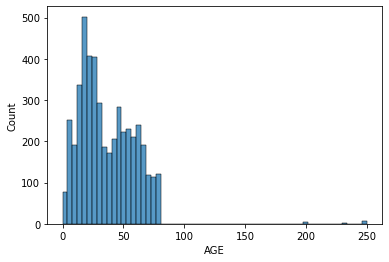

In [14]:
statistical_analysis(df_used['AGE'], q = [.25, .5, .75, .8, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99, .997, .999, 1])

In [15]:
df_used = df_used.loc[df_used['AGE'] < 100]

Среднее равно 36.05296343001261
Дисперсия равна 419.9160507075114
Стандартное отклонение равно 20.491853276546546
    уровень квантиля  quantile     ratio
0              0.250      19.0  0.000000
1              0.500      31.0  1.631579
2              0.750      53.0  1.709677
3              0.800      57.0  1.075472
4              0.900      65.0  1.140351
5              0.910      66.0  1.015385
6              0.920      67.0  1.015152
7              0.930      69.0  1.029851
8              0.940      71.0  1.028986
9              0.950      72.0  1.014085
10             0.960      74.0  1.027778
11             0.970      76.0  1.027027
12             0.980      77.0  1.013158
13             0.990      79.0  1.025974
14             0.997      80.0  1.012658
15             0.999      80.0  1.000000
16             1.000      80.0  1.000000
Межквартильный размах:  34.0


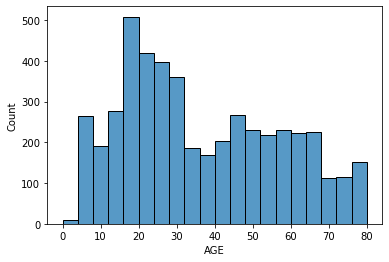

In [16]:
statistical_analysis(df_used['AGE'], q = [.25, .5, .75, .8, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99, .997, .999, 1])

Среднее равно 24.89344262295082
Дисперсия равна 121.14966899513065
Стандартное отклонение равно 11.006801033685067
    уровень квантиля  quantile     ratio
0              0.250      17.0  0.000000
1              0.500      25.0  1.470588
2              0.750      32.0  1.280000
3              0.800      34.0  1.062500
4              0.900      39.0  1.147059
5              0.910      40.0  1.025641
6              0.920      42.0  1.050000
7              0.930      43.0  1.023810
8              0.940      44.0  1.023256
9              0.950      45.0  1.022727
10             0.960      46.0  1.022222
11             0.970      48.0  1.043478
12             0.980      48.0  1.000000
13             0.990      49.0  1.020833
14             0.997      50.0  1.020408
15             0.999      50.0  1.000000
16             1.000      50.0  1.000000
Межквартильный размах:  15.0


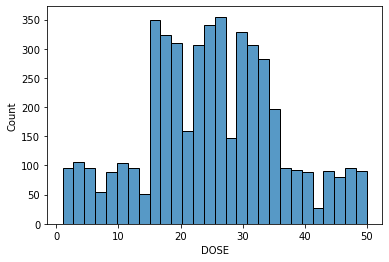

In [17]:
statistical_analysis(df_used['DOSE'], q = [.25, .5, .75, .8, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99, .997, .999, 1])

Среднее равно 177.15636363636364
Дисперсия равна 564.9381040183591
Стандартное отклонение равно 23.768426620589743
    уровень квантиля  quantile     ratio
0             0.0200     104.0  0.000000
1             0.2500     167.0  1.605769
2             0.5000     181.0  1.083832
3             0.7500     195.0  1.077348
4             0.8000     198.0  1.015385
5             0.9000     203.0  1.025253
6             0.9100     204.0  1.004926
7             0.9200     204.0  1.000000
8             0.9300     205.0  1.004902
9             0.9400     206.0  1.004878
10            0.9500     206.0  1.000000
11            0.9600     207.0  1.004854
12            0.9700     207.0  1.000000
13            0.9800     208.0  1.004831
14            0.9900     209.0  1.004808
15            0.9970     209.0  1.000000
16            0.9990     209.0  1.000000
17            0.9995     209.0  1.000000
18            1.0000     209.0  1.000000
Межквартильный размах:  28.0


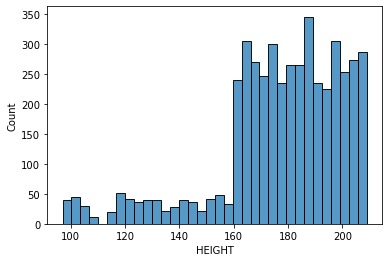

In [27]:
statistical_analysis(df_used['HEIGHT'], q = [0.02, .25, .5, .75, .8, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99, .997, .999, .9995, 1])

In [26]:
df_used = df_used[(df_used['HEIGHT']<210)&(df_used['HEIGHT']>0)]

Среднее равно 91.23572192513369
Дисперсия равна 1897.2152833629748
Стандартное отклонение равно 43.55703483207936
    уровень квантиля  quantile     ratio
0             0.0200     17.48  0.000000
1             0.2500     62.00  3.546911
2             0.5000     91.00  1.467742
3             0.7500    121.00  1.329670
4             0.8000    127.00  1.049587
5             0.9000    139.00  1.094488
6             0.9100    140.00  1.007194
7             0.9200    142.00  1.014286
8             0.9300    143.00  1.007042
9             0.9400    144.00  1.006993
10            0.9500    145.00  1.006944
11            0.9600    146.04  1.007172
12            0.9700    147.78  1.011915
13            0.9800    148.00  1.001489
14            0.9900    150.00  1.013514
15            0.9970    150.00  1.000000
16            0.9990    529.34  3.528933
17            0.9995    613.26  1.158537
18            1.0000   1159.00  1.889900
Межквартильный размах:  59.0


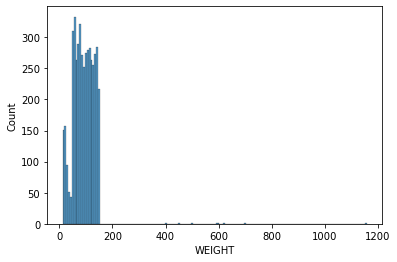

In [28]:
statistical_analysis(df_used['WEIGHT'], q = [0.02, .25, .5, .75, .8, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99, .997, .999, .9995, 1])

In [29]:
df_used = df_used[df_used['WEIGHT']<150]

Среднее равно 89.65727902946274
Дисперсия равна 1298.1408050757595
Стандартное отклонение равно 36.0297211351373
    уровень квантиля  quantile     ratio
0             0.0200      17.0  0.000000
1             0.2500      62.0  3.647059
2             0.5000      90.0  1.451613
3             0.7500     120.0  1.333333
4             0.8000     126.0  1.050000
5             0.9000     138.0  1.095238
6             0.9100     139.0  1.007246
7             0.9200     140.0  1.007194
8             0.9300     141.0  1.007143
9             0.9400     143.0  1.014184
10            0.9500     144.0  1.006993
11            0.9600     145.0  1.006944
12            0.9700     146.0  1.006897
13            0.9800     147.0  1.006849
14            0.9900     148.0  1.006803
15            0.9970     149.0  1.006757
16            0.9990     149.0  1.000000
17            0.9995     149.0  1.000000
18            1.0000     149.0  1.000000
Межквартильный размах:  58.0


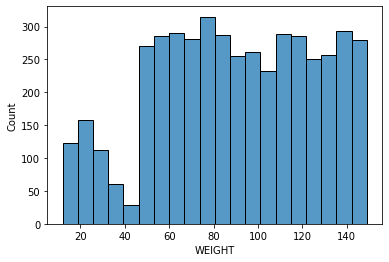

In [30]:
statistical_analysis(df_used['WEIGHT'], q = [0.02, .25, .5, .75, .8, .9, .91, .92, .93, .94, .95, .96, .97, .98, .99, .997, .999, .9995, 1])

In [31]:
df_used['WEIGHT'].min()

12.0

<AxesSubplot:xlabel='GENDER', ylabel='Count'>

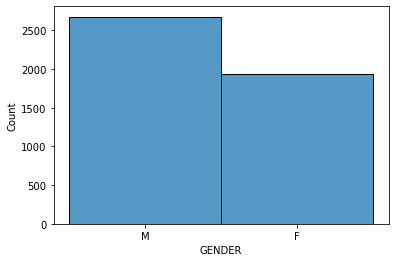

In [32]:
sns.histplot(df_used['GENDER'])

<AxesSubplot:xlabel='IS_CAUCAS', ylabel='Count'>

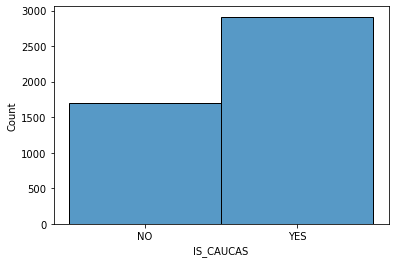

In [33]:
sns.histplot(df_used['IS_CAUCAS'])

<AxesSubplot:xlabel='HAS_APPENDIX', ylabel='Count'>

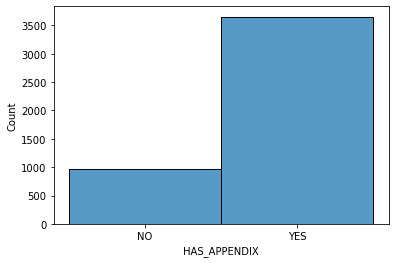

In [34]:
sns.histplot(df_used['HAS_APPENDIX'])

<AxesSubplot:xlabel='HAS_ALLERGY', ylabel='Count'>

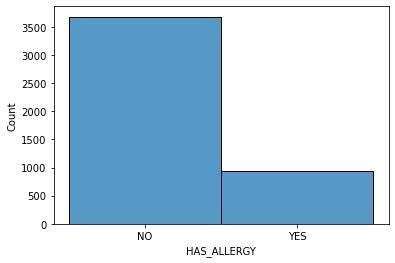

In [35]:
sns.histplot(df_used['HAS_ALLERGY'])

In [37]:
df_used.HAS_ALLERGY=df_used.HAS_ALLERGY.map({'NO':0, 'YES':1})

In [38]:
df_used

,ID_SIMPERS,FLAG_MUT,AGE,DOSE,HEIGHT,WEIGHT,GENDER,IS_CAUCAS,HAS_APPENDIX,HAS_ALLERGY
0,10002748,1.0,17.0,19.0,164.0,120.0,M,NO,NO,0
1,10003438,0.0,62.0,17.0,169.0,137.0,M,YES,YES,0
2,10004371,1.0,5.0,24.0,100.0,21.0,M,YES,NO,0
3,10002836,1.0,13.0,29.0,154.0,48.0,F,NO,NO,0
4,10000347,0.0,35.0,28.0,198.0,121.0,M,YES,YES,1
...,...,...,...,...,...,...,...,...,...,...
4882,10004629,0.0,52.0,39.0,165.0,90.0,M,YES,YES,0
4883,10002019,0.0,20.0,24.0,166.0,115.0,M,NO,YES,0
4884,10001901,0.0,44.0,20.0,205.0,121.0,F,NO,NO,0
4885,10000011,0.0,28.0,5.0,171.0,87.0,F,YES,YES,1


In [39]:
df_used.HAS_APPENDIX=df_used.HAS_APPENDIX.map({'NO':0, 'YES':1})

In [40]:
df_used.IS_CAUCAS=df_used.IS_CAUCAS.map({'NO':0, 'YES':1})

In [41]:
df_used.GENDER=df_used.GENDER.map({'M':0, 'F':1})

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [63]:
X = df_used[['AGE','DOSE','HEIGHT','WEIGHT','GENDER','IS_CAUCAS', 'HAS_APPENDIX', 'HAS_ALLERGY']]
y = df_used['FLAG_MUT']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(
    df_used.drop(['ID_SIMPERS','FLAG_MUT'], axis=1),
    df_used.FLAG_MUT,
    test_size= 0.3,
    random_state=0,
    stratify=df_used.FLAG_MUT
)

In [55]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [56]:
y_pred = tree.predict(X_test)

In [57]:
acc = accuracy_score(y_test,y_pred)

In [58]:
acc

0.6548736462093863

In [59]:
cm=confusion_matrix(y_test, y_pred)
cm

array([[583, 267],
       [211, 324]], dtype=int64)

<AxesSubplot:>

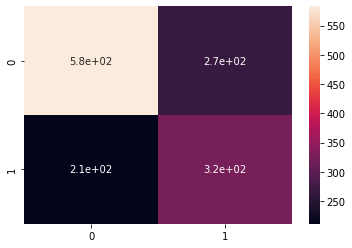

In [60]:
sns.heatmap(cm,annot=True)

<BarContainer object of 8 artists>

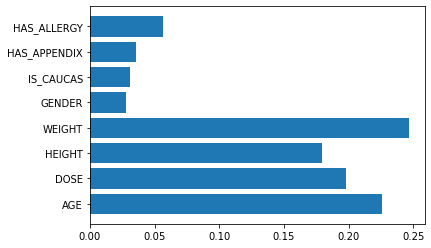

In [62]:
plt.barh(X_train.columns, tree.feature_importances_)
#показывает силу влияния фичей


In [73]:
result = pd.DataFrame(columns = ['test_size', 'accuracy'])
for i in range(1,50):
    X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = i/100,
    random_state=0,
    stratify=y)
    tree = DecisionTreeClassifier()
    tree.fit(X_train, y_train)
    y_pred = tree.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    result = result.append({'test_size':i, 'accuracy':acc}, ignore_index = True)


C:\Users\zhann\AppData\Local\Temp/ipykernel_13676/1940487407.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'test_size':i, 'accuracy':acc}, ignore_index = True)
C:\Users\zhann\AppData\Local\Temp/ipykernel_13676/1940487407.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'test_size':i, 'accuracy':acc}, ignore_index = True)
C:\Users\zhann\AppData\Local\Temp/ipykernel_13676/1940487407.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'test_size':i, 'accuracy':acc}, ignore_index = True)
C:\Users\zhann\AppData\Local\Temp/ipykernel_13676/1940487407.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

C:\Users\zhann\AppData\Local\Temp/ipykernel_13676/1940487407.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'test_size':i, 'accuracy':acc}, ignore_index = True)
C:\Users\zhann\AppData\Local\Temp/ipykernel_13676/1940487407.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'test_size':i, 'accuracy':acc}, ignore_index = True)
C:\Users\zhann\AppData\Local\Temp/ipykernel_13676/1940487407.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append({'test_size':i, 'accuracy':acc}, ignore_index = True)
C:\Users\zhann\AppData\Local\Temp/ipykernel_13676/1940487407.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fu

In [74]:
result

,test_size,accuracy
0,1.0,0.680851
1,2.0,0.580645
2,3.0,0.582734
3,4.0,0.643243
4,5.0,0.675325
5,6.0,0.685921
6,7.0,0.654321
7,8.0,0.643243
8,9.0,0.651442
9,10.0,0.649351


C:\Users\zhann\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='test_size', ylabel='accuracy'>

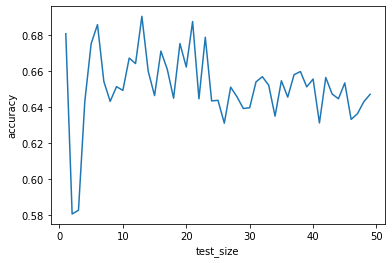

In [75]:
sns.lineplot(result['test_size'], result['accuracy'])

Ориентируемся на середину